In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib.dates as mdates

In [17]:
data_file = 'HT101_original_05-09-2017_30-09-2017_raw.csv'
date_col = 'Date'
label_col = 'KMeansLabel'
plot_title = 'HT101\n09/17'
colors = ['#a1d0e7', '#ffb9b5', '#b5ffb9', '#f4ff88', '#f9bc86', '#b7ffff', '#d6d6d6', '#534e42', '#FF530D', '#FF0DFF',
          '#1B570C', '#570C2D', '#E80C97','#E7FFAF']
#patterns = ['-', '+', 'x', '\\', '*', 'o', 'O', '.', '/']


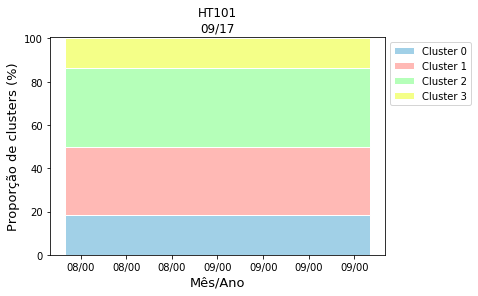

In [18]:
def to_mydate(timestamp):
	return (mdates.date2num(dt.strptime(timestamp.rpartition('-')[0],'%m')))

dataframe = pd.read_csv(data_file, usecols=[date_col,label_col])

dataframe[date_col] = dataframe[date_col].apply(to_mydate)
months = dataframe[date_col].unique()
labels = np.sort(dataframe[label_col].unique())

count_total = []
for date in months:
	month = dataframe[dataframe[date_col]==date]
	count_month = []
	for label in labels:
		count = month[month[label_col]==label]
		count_month.append(len(count[count==True]))
	count_total.append(count_month)

totals=pd.DataFrame(count_total).sum(axis=1).tolist()

percent_total = []
for i in range(len(months)):
	percent_month = []
	for j in labels:
		percent_month.append(count_total[i][j]/totals[i]*100)
	percent_total.append(percent_month)

percent_total = list(map(list, zip(*percent_total)))

fig, ax = plt.subplots()
for i in labels:
	if i == 0:
		b = percent_total[i]
		plt.bar(months, percent_total[i], width=20, label='Cluster '+str(i),
		#plt.bar(months, percent_total[i], width=20, label='Cluster '+str(i), zorder=3,
			#color='white', edgecolor='black', hatch=patterns[i])
			color=colors[i], edgecolor='white')
	else:
		plt.bar(months, percent_total[i], bottom=b, width=20, label='Cluster '+str(i),
		#plt.bar(months, percent_total[i], bottom=b, width=20, label='Cluster '+str(i), zorder=3,
			#color='white', edgecolor='black', hatch=patterns[i])
			color=colors[i], edgecolor='white')
		b = [i+j for i,j in zip(b, percent_total[i])]
        
plt.title(plot_title)
plt.xlabel('Mês/Ano', fontsize= 13)
plt.ylabel('Proporção de clusters (%)', fontsize= 13)
#ax.grid(linestyle='--', alpha=0.5, zorder=0)
ax.set_ylim([0,100.5])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

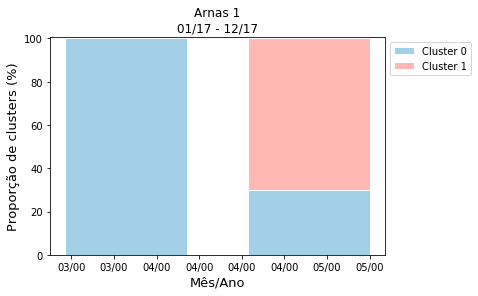

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib.dates as mdates

data_file = 'HT101_original_04-04-2017_31-05-2017_raw_modified.csv'
date_col = 'Date'
label_col = 'KMeansLabel'
plot_title = 'Arnas 1\n01/17 - 12/17'
colors = ['#a1d0e7', '#ffb9b5', '#b5ffb9', '#f4ff88', '#f9bc86', '#b7ffff', '#d6d6d6', '#534e42']
#patterns = ['-', '+', 'x', '\\', '*', 'o', 'O', '.', '/']

def to_mydate(timestamp):
	return (mdates.date2num(dt.strptime(timestamp.rpartition('-')[0], '%m')))

dataframe = pd.read_csv(data_file, usecols=[date_col,label_col])

dataframe[date_col] = dataframe[date_col].apply(to_mydate)
months = dataframe[date_col].unique()
labels = np.sort(dataframe[label_col].unique())

count_total = []
for date in months:
	month = dataframe[dataframe[date_col]==date]
	count_month = []
	for label in labels:
		count = month[month[label_col]==label]
		count_month.append(len(count[count==True]))
	count_total.append(count_month)

totals=pd.DataFrame(count_total).sum(axis=1).tolist()

percent_total = []
for i in range(len(months)):
	percent_month = []
	for j in labels:
		percent_month.append(count_total[i][j]/totals[i]*100)
	percent_total.append(percent_month)

percent_total = list(map(list, zip(*percent_total)))

fig, ax = plt.subplots()
for i in labels:
	if i == 0:
		b = percent_total[i]
		plt.bar(months, percent_total[i], width=20, label='Cluster '+str(i),
		#plt.bar(months, percent_total[i], width=20, label='Cluster '+str(i), zorder=3,
			#color='white', edgecolor='black', hatch=patterns[i])
			color=colors[i], edgecolor='white')
	else:
		plt.bar(months, percent_total[i], bottom=b, width=20, label='Cluster '+str(i),
		#plt.bar(months, percent_total[i], bottom=b, width=20, label='Cluster '+str(i), zorder=3,
			#color='white', edgecolor='black', hatch=patterns[i])
			color=colors[i], edgecolor='white')
		b = [i+j for i,j in zip(b, percent_total[i])]

plt.title(plot_title)
plt.xlabel('Mês/Ano', fontsize= 13)
plt.ylabel('Proporção de clusters (%)', fontsize= 13)
#ax.grid(linestyle='--', alpha=0.5, zorder=0)
ax.set_ylim([0,100.5])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()